In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('allUFCfightsclean.csv')

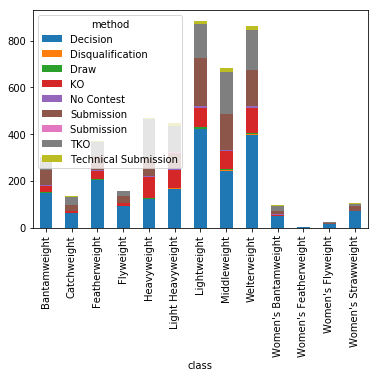

In [3]:
df.groupby(['class','method'])['method'].size().unstack().plot(kind='bar',stacked=True)

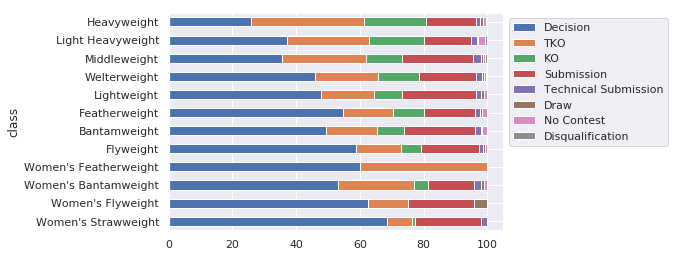

In [54]:
sns.set()
df.groupby(['class','method']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().loc[weightOrder,methodOrder].plot(kind='barh',stacked=True).legend(loc='upper left', bbox_to_anchor=(1,1))

In [7]:
df['class'].value_counts()

Lightweight              895
Welterweight             866
Middleweight             686
Heavyweight              470
Light Heavyweight        447
Featherweight            374
Bantamweight             304
Flyweight                160
Catchweight              134
Women's Strawweight      105
Women's Bantamweight      97
Women's Flyweight         24
Women's Featherweight      5
Name: class, dtype: int64

In [5]:
weightOrder=["Women's Strawweight","Women's Flyweight","Women's Bantamweight","Women's Featherweight","Flyweight","Bantamweight","Featherweight","Lightweight","Welterweight","Middleweight","Light Heavyweight","Heavyweight"]

In [7]:
df['method'].value_counts()

Decision                2006
TKO                     1005
Submission               950
KO                       530
Technical Submission      83
No Contest                45
Draw                      32
Disqualification          14
Submission                 2
Name: method, dtype: int64

In [6]:
methodOrder=["Decision","TKO","KO","Submission","Technical Submission","Draw","No Contest","Disqualification"]

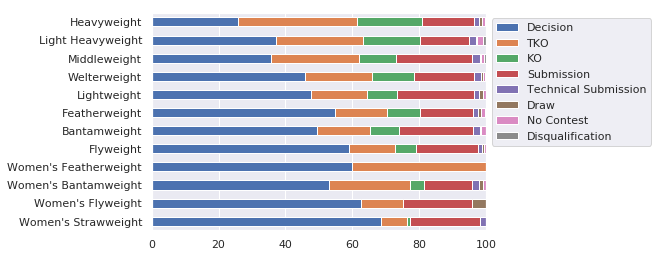

In [53]:
sns.set()
df.groupby(['class','method']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().loc[weightOrder,methodOrder].plot(kind='barh',stacked=True).legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlim(0,100)
plt.ylabel("")
plt.savefig('ufcclasspercent.png', dpi=250, bbox_inches="tight")

In [8]:
df.tail()

,Unnamed: 0,fighter1,fighter2,method,date,event,class
4684,4684,Ken Shamrock,Patrick Smith,Submission,"Nov 12, 1993",UFC 1,NaN
4685,4685,Royce Gracie,Art Jimmerson,Submission,"Nov 12, 1993",UFC 1,NaN
4686,4686,Kevin Rosier,Zane Frazier,TKO,"Nov 12, 1993",UFC 1,NaN
4687,4687,Gerard Gordeau,Teila Tuli,TKO,"Nov 12, 1993",UFC 1,NaN
4688,4688,Jason DeLucia,Trent Jenkins,Submission,"Nov 12, 1993",UFC 1,NaN


In [9]:
df['year']=df['date'].apply(lambda x: int(x.split(',')[-1].strip()))

In [10]:
df['year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64

In [11]:
df['year'].value_counts()

2014    514
2016    493
2015    473
2017    457
2013    363
2011    300
2012    298
2018    274
2010    253
2009    215
2008    201
2007    162
2006    158
2005     80
2002     53
1999     44
2000     43
1996     43
1997     41
2003     41
1995     40
2001     40
2004     39
1994     31
1998     25
1993      8
Name: year, dtype: int64

In [19]:
df['period']=pd.cut(df['year'], bins=[1992,1995,2000,2005,2010,2015,2018])

In [20]:
df.tail(10)

,Unnamed: 0,fighter1,fighter2,method,date,event,class,year,period
4679,4679,Jason DeLucia,Scott Baker,Submission,"Mar 11, 1994",UFC 2,NaN,1994,"(1992, 1995]"
4680,4680,Royce Gracie,Minoki Ichihara,Submission,"Mar 11, 1994",UFC 2,NaN,1994,"(1992, 1995]"
4681,4681,Royce Gracie,Gerard Gordeau,Submission,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4682,4682,Royce Gracie,Ken Shamrock,Submission,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4683,4683,Gerard Gordeau,Kevin Rosier,TKO,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4684,4684,Ken Shamrock,Patrick Smith,Submission,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4685,4685,Royce Gracie,Art Jimmerson,Submission,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4686,4686,Kevin Rosier,Zane Frazier,TKO,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4687,4687,Gerard Gordeau,Teila Tuli,TKO,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"
4688,4688,Jason DeLucia,Trent Jenkins,Submission,"Nov 12, 1993",UFC 1,NaN,1993,"(1992, 1995]"


In [21]:
df.head()

,Unnamed: 0,fighter1,fighter2,method,date,event,class,year,period
0,0,Dustin Poirier,Eddie Alvarez,TKO,"Jul 28, 2018",UFC on Fox: Alvarez vs. Poirier 2,Lightweight,2018,"(2015, 2018]"
1,1,José Aldo,Jeremy Stephens,TKO,"Jul 28, 2018",UFC on Fox: Alvarez vs. Poirier 2,Featherweight,2018,"(2015, 2018]"
2,2,Joanna Jędrzejczyk,Tecia Torres,Decision,"Jul 28, 2018",UFC on Fox: Alvarez vs. Poirier 2,Women's Strawweight,2018,"(2015, 2018]"
3,3,Alexander Hernandez,Olivier Aubin-Mercier,Decision,"Jul 28, 2018",UFC on Fox: Alvarez vs. Poirier 2,Lightweight,2018,"(2015, 2018]"
4,4,Jordan Mein,Alex Morono,Decision,"Jul 28, 2018",UFC on Fox: Alvarez vs. Poirier 2,Welterweight,2018,"(2015, 2018]"


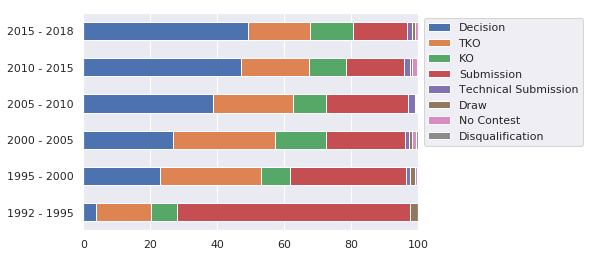

In [52]:
sns.set()
df.groupby(['period','method']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().loc[:,methodOrder].plot(kind='barh',stacked=True).legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlim(0,100)
plt.ylabel("")
plt.yticks(range(6),[re.sub('[\[\]\(\)]','',str(i)).replace(',',' -') for i in df['period'].unique().astype(list)][::-1])
plt.savefig('ufcperiodpercent.png', dpi=250, bbox_inches="tight")

In [33]:
df['period'].unique().astype(list)

array([Interval(2015, 2018, closed='right'),
       Interval(2010, 2015, closed='right'),
       Interval(2005, 2010, closed='right'),
       Interval(2000, 2005, closed='right'),
       Interval(1995, 2000, closed='right'),
       Interval(1992, 1995, closed='right')], dtype=object)